# Градиентный бустинг. Отчет

### 1. Пропуски среди своих значений имеют признаки: 
-  first_blood_time
-  first_blood_team
-  first_blood_player1
-  first_blood_player2
-  radiant_bottle_time
-  radiant_courier_time
-  radiant_flying_courier_time
-  radiant_first_ward_time
-  dire_bottle_time
-  dire_courier_time
-  dire_flying_courier_time
-  dire_first_ward_time

Пропуск в признаке *first_blood_time* может означать, что в первые 5 минут матча не происходило убийства.

Пропуск в признаке *dire_first_ward_time* может означать, что в первые 5 минут матча "наблюдатель" не был поставлен.

### 2. Как называется столбец, содержащий целевую переменную?

*radiant_win*

### 3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Какое качество при этом получилось?

__Время__: 0:01:45.821000. __Качество__: 0.69


### 4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?

Как видно из графика, увеличение числа деревьев приводит к увеличению качества кросс-валидации. Поэтому имеет смысл использовать больше 30 деревьев.

Для ускорения обучения можно снизить глубину деревьев (max_depth) и уменьшить число блоков разбиений для кросс-валидации. Стоит отменить, что при этом падает качество обучения.

# Градиентный бустинг. Код

In [53]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from __future__ import division

### 1. Считайте таблицу с признаками из файла features.csv.

In [3]:
features = pd.read_csv('features.csv', index_col='match_id')
features.drop([
    'duration', 
    'radiant_win', 
    'tower_status_radiant', 
    'tower_status_dire', 
    'barracks_status_radiant',
    'barracks_status_dire'
], axis=1, inplace=True)

### 2. Проверьте выборку на наличие пропусков с помощью функции count().

In [ ]:
print(features.shape)
print(features.count())

### 3. Замените пропуски на нули с помощью функции fillna().

In [4]:
features.fillna(value=0, inplace=True)

### 4. Какой столбец содержит целевую переменную.

In [ ]:
# Столбец radiant_win

### 5. Попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". 

In [67]:
data = pd.read_csv('features.csv')
data.fillna(value=0, inplace=True)
X_train = data.drop([
    'duration', 
    'radiant_win', 
    'tower_status_radiant', 
    'tower_status_dire', 
    'barracks_status_radiant',
    'barracks_status_dire'
], axis=1)
y_train = data['radiant_win']

scores = []
n_trees = [5, 10, 15, 20, 25, 30, 40, 80, 160, 200, 250, 300, 400]
#n_trees = [10, 20, 30]
kf = KFold(n=len(y_train.values), n_folds=5, shuffle=True, random_state=42)
for n_est in n_trees:
    clf = GradientBoostingClassifier(
        n_estimators=n_est, 
        random_state=241, 
        learning_rate=0.1)
    start_time = datetime.datetime.now()
    score = cross_val_score(clf, X_train.values, y_train.values, cv=kf, scoring='roc_auc')
    print 'Time elapsed: ', datetime.datetime.now() - start_time
    print 'n_trees:', n_est, '. Score:', score
    scores.append(np.mean(score))

Time elapsed:  0:00:17.556000
n_trees: 5 . Score: [ 0.63397413  0.64193832  0.63298826  0.63554642  0.63234004]
Time elapsed:  0:00:29.042000
n_trees: 10 . Score: [ 0.66383799  0.66635457  0.66360048  0.66529818  0.66516222]
Time elapsed:  0:00:41.349000
n_trees: 15 . Score: [ 0.67589098  0.67647457  0.67383635  0.67687101  0.67817953]
Time elapsed:  0:00:54.887000
n_trees: 20 . Score: [ 0.68083889  0.68272733  0.67969876  0.6834932   0.6855512 ]
Time elapsed:  0:01:07.123000
n_trees: 25 . Score: [ 0.68641138  0.68606793  0.6838322   0.68810339  0.68906025]
Time elapsed:  0:01:23.529000
n_trees: 30 . Score: [ 0.68892093  0.68934663  0.68712298  0.69180598  0.69283583]
Time elapsed:  0:01:45.821000
n_trees: 40 . Score: [ 0.69264125  0.69335305  0.69153074  0.69586466  0.69680392]
Time elapsed:  0:03:31.315000
n_trees: 80 . Score: [ 0.70272368  0.70352284  0.70166409  0.70536378  0.70579495]
Time elapsed:  0:06:59.689000
n_trees: 160 . Score: [ 0.70965102  0.71083336  0.71000567  0.71237

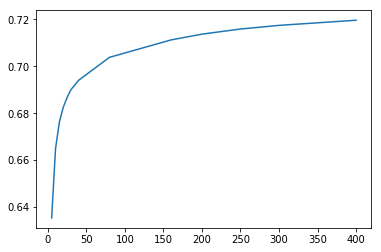

In [68]:
plt.plot(n_trees, scores)
plt.show()